In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rie_estimator
import csestimator
import matplotlib.cm as cm

Me quedo verificando los histogramas de los valores propios de los 3 estimadores de correlación a partir de los retornos históricos de los activos de cada mercado. Notar acá que el Dr. Andrés sugirió no tomar todos los rendimientos de los activos de golpe, sino que era necesario ir tomando proporcionalmente los rendimientos históricos para que q = 1/2 y en cada uno de estos periodos sacar los valores propios, luego juntarlos todos y sacar el histograma de los agregados. 

In [2]:
sns.set(rc={'figure.figsize':(15,8.27)})

Leemos los rendimientos de los activos seleccionados. 

In [3]:
european_prices = pd.read_csv('european_market_original_clean.csv', index_col = "Date")
american_prices = pd.read_csv('sp_500_original_clean.csv', index_col = "Date")

In [4]:
european_returns = (np.log(european_prices) - np.log(european_prices.shift(1))).iloc[1:]
american_returns = (np.log(american_prices) - np.log(american_prices.shift(1))).iloc[1:]

Normalizamos estos rendimientos

In [5]:
norm_european_returns = (european_returns -european_returns.mean()) / european_returns.std()
norm_american_returns = (american_returns -american_returns.mean()) / american_returns.std()

In [6]:
numbs_obser_amer = norm_american_returns.shape[1] *2
numbs_obser_eur = norm_european_returns.shape[1] *2

In [7]:
samp_corr_european = european_returns.iloc[:numbs_obser_eur,:].corr()
samp_corr_american = american_returns.iloc[:numbs_obser_amer, :].corr()

In [8]:
rie_est_american = rie_estimator.get_rie(norm_american_returns.iloc[:numbs_obser_amer, :])
rie_est_european = rie_estimator.get_rie(norm_european_returns.iloc[:numbs_obser_eur,:])

In [9]:
shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.5)
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.2)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.2)
shrink_estimator_european_1 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.8)
shrink_estimator_american_1 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.8)

In [10]:
samp_corr_european_norm = norm_european_returns.iloc[:numbs_obser_eur,:].corr()
samp_corr_american_norm = norm_american_returns.iloc[:numbs_obser_amer,:].corr()

Calcular la distancia entre rie y correlacion muestral:

mercado americano

In [13]:
print(np.linalg.norm(((samp_corr_american - rie_est_american).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_american - shrink_estimator_american_5).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_american - shrink_estimator_american_2).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_american - shrink_estimator_american_1).values), ord = "fro"))
print(np.linalg.norm(((rie_est_american - shrink_estimator_american_5)), ord = "fro"))

5.226645095417541
36.91491594032094
14.765966376128409
59.06386550451373
36.19021950849759


mercado europeo

In [14]:
print(np.linalg.norm(((samp_corr_european - rie_est_european).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_european - shrink_estimator_european_5).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_european - shrink_estimator_european_2).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_european - shrink_estimator_european_1).values), ord = "fro"))
print(np.linalg.norm(((rie_est_european - shrink_estimator_european_5)), ord = "fro"))

4.4610880251529705
20.334023436452945
8.13360937458114
32.534437498324564
19.465563584419495


### Gráficas de los valores propios con q = 1/2

In [38]:
rie_est_american = rie_estimator.get_rie(norm_american_returns.iloc[:numbs_obser_amer, :])
rie_est_european = rie_estimator.get_rie(norm_european_returns.iloc[:numbs_obser_eur,:])

shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.5)
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.2)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.2)
shrink_estimator_european_1 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 1)
shrink_estimator_american_1 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 1)

samp_corr_european_norm = norm_european_returns.iloc[:numbs_obser_eur,:].corr()
samp_corr_american_norm = norm_american_returns.iloc[:numbs_obser_amer,:].corr()

In [39]:
eigenval_sample_american, eigenvec_sample_american = np.linalg.eig(samp_corr_american_norm.values)
eigenval_rie_american, eigenvec_rie_american = np.linalg.eig(rie_est_american)
eigenval_shrink_american, eigenvec_shrink_american = np.linalg.eig(shrink_estimator_american_5)
eigenval_sample_american.sort()
eigenval_rie_american.sort()
eigenval_shrink_american.sort()

In [40]:
eigenval_sample_european, eigenvec_sample_european = np.linalg.eig(samp_corr_european_norm.values)
eigenval_rie_european, eigenvec_rie_european = np.linalg.eig(rie_est_european)
eigenval_shrink_european, eigenvec_shrink_european = np.linalg.eig(shrink_estimator_european_5)
eigenval_sample_european.sort()
eigenval_rie_european.sort()
eigenval_shrink_european.sort()

TODO: WTF, como interpretar los eigenvalores de la matriz de correlación muestral de los activos finaniceros diarios. 

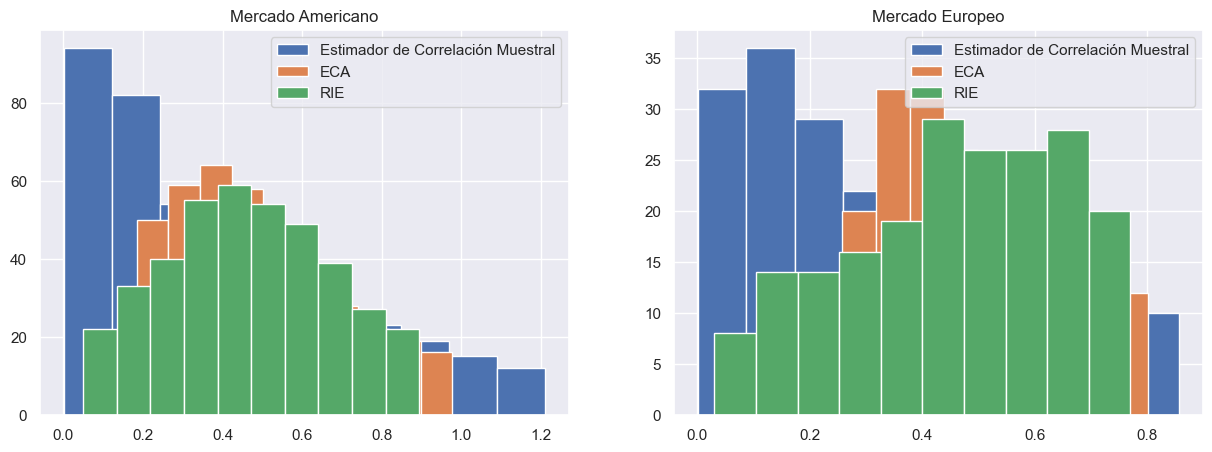

In [41]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_american[:400])
axs[0].hist(eigenval_shrink_american[:400])
axs[0].hist(eigenval_rie_american[:400])
axs[0].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Mercado Americano")

axs[1].hist(eigenval_sample_european[:200])
axs[1].hist(eigenval_shrink_european[:200])
axs[1].hist(eigenval_rie_european[:200])
axs[1].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n de correlación. Mercado Europeo"
axs[1].set_title("Mercado Europeo")
plt.show()

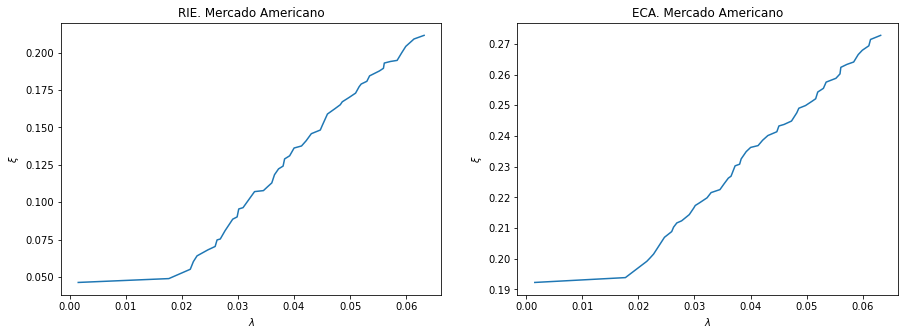

In [137]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(eigenval_sample_american[:50], eigenval_rie_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[0].set_title("RIE. Mercado Americano")
axs[0].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')

axs[1].plot(eigenval_sample_american[:50], eigenval_shrink_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[1].set_title("ECA. Mercado Americano")
axs[1].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')
plt.show()


Utilizando el siguiente periodo de tiempo

In [19]:
numbs_obser_eur

536

In [18]:
european_returns.shape

(2448, 268)

In [20]:
2448/536

4.567164179104478

In [17]:
2521/920

2.740217391304348

In [89]:
rie_est_american = rie_estimator.get_rie(norm_american_returns.iloc[801:1600, :])
rie_est_european = rie_estimator.get_rie(norm_european_returns.iloc[501:1000,:])

shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns.iloc[501:1000,:], 0.5)
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns.iloc[801:1600,:], 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns.iloc[501:1000,:], 0.2)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns.iloc[801:1600,:], 0.2)
shrink_estimator_european_1 = csestimator.get_shrinkage_est(norm_european_returns.iloc[501:1000,:], 1)
shrink_estimator_american_1 = csestimator.get_shrinkage_est(norm_american_returns.iloc[801:1600,:], 1)

samp_corr_european_norm = norm_european_returns.iloc[501:1000,:].corr()
samp_corr_american_norm = norm_american_returns.iloc[801:1600,:].corr()

In [90]:
eigenval_sample_american, eigenvec_sample_american = np.linalg.eig(samp_corr_american_norm.values)
eigenval_rie_american, eigenvec_rie_american = np.linalg.eig(rie_est_american)
eigenval_shrink_american, eigenvec_shrink_american = np.linalg.eig(shrink_estimator_american_5)
eigenval_sample_american.sort()
eigenval_rie_american.sort()
eigenval_shrink_american.sort()

In [92]:
eigenval_sample_european, eigenvec_sample_european = np.linalg.eig(samp_corr_european.values)
eigenval_rie_european, eigenvec_rie_european = np.linalg.eig(rie_est_european)
eigenval_shrink_european, eigenvec_shrink_european = np.linalg.eig(shrink_estimator_european_5)
eigenval_sample_european.sort()
eigenval_rie_european.sort()
eigenval_shrink_european.sort()

Text(0.5, 1.0, 'Distribución de los valores propios de los estimadores de correlación. Mercado Americano')

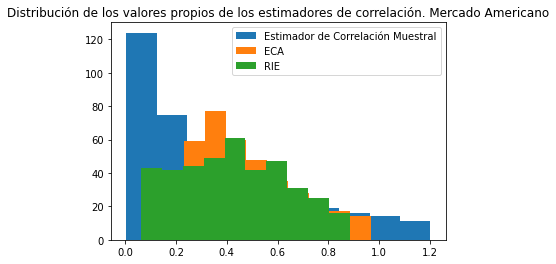

In [93]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_american[:400])
axs[0].hist(eigenval_shrink_american[:400])
axs[0].hist(eigenval_rie_american[:400])
axs[0].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Mercado Americano")

axs[1].hist(eigenval_sample_european[:200])
axs[1].hist(eigenval_shrink_european[:200])
axs[1].hist(eigenval_rie_european[:200])
axs[1].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n de correlación. Mercado Europeo"
axs[1].set_title("Mercado Europeo")
plt.show()

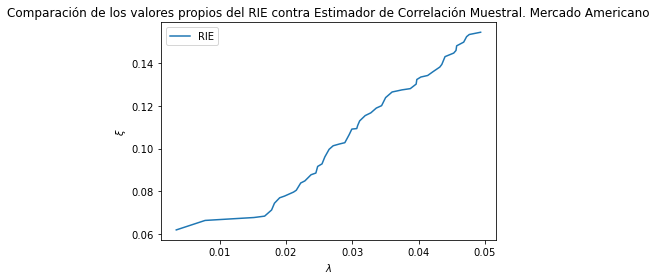

In [95]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(eigenval_sample_american[:50], eigenval_rie_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[0].set_title("RIE. Mercado Americano")
axs[0].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')

axs[1].plot(eigenval_sample_american[:50], eigenval_shrink_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[1].set_title("ECA. Mercado Americano")
axs[1].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')
plt.show()


Con el último periodo de tiempo

In [98]:
rie_est_american = rie_estimator.get_rie(norm_american_returns.iloc[1601:, :])
rie_est_european = rie_estimator.get_rie(norm_european_returns.iloc[1001:1500,:])

shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns.iloc[1001:1500,:], 0.5)
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns.iloc[1601:,:], 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns.iloc[1001:1500,:], 0.2)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns.iloc[1601:,:], 0.2)
shrink_estimator_european_1 = csestimator.get_shrinkage_est(norm_european_returns.iloc[1001:1500,:], 1)
shrink_estimator_american_1 = csestimator.get_shrinkage_est(norm_american_returns.iloc[1601:,:], 1)

samp_corr_european_norm = norm_european_returns.iloc[1001:1500,:].corr()
samp_corr_american_norm = norm_american_returns.iloc[1601:,:].corr()

In [99]:
eigenval_sample_american, eigenvec_sample_american = np.linalg.eig(samp_corr_american_norm.values)
eigenval_rie_american, eigenvec_rie_american = np.linalg.eig(rie_est_american)
eigenval_shrink_american, eigenvec_shrink_american = np.linalg.eig(shrink_estimator_american_5)
eigenval_sample_american.sort()
eigenval_rie_american.sort()
eigenval_shrink_american.sort()

In [100]:
eigenval_sample_european, eigenvec_sample_european = np.linalg.eig(samp_corr_european.values)
eigenval_rie_european, eigenvec_rie_european = np.linalg.eig(rie_est_european)
eigenval_shrink_european, eigenvec_shrink_european = np.linalg.eig(shrink_estimator_european_5)
eigenval_sample_european.sort()
eigenval_rie_european.sort()
eigenval_shrink_european.sort()

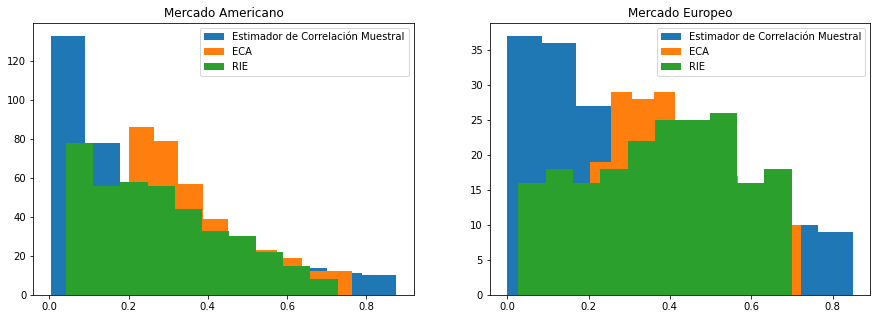

In [122]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_american[:400])
axs[0].hist(eigenval_shrink_american[:400])
axs[0].hist(eigenval_rie_american[:400])
axs[0].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Mercado Americano")

axs[1].hist(eigenval_sample_european[:200])
axs[1].hist(eigenval_shrink_european[:200])
axs[1].hist(eigenval_rie_european[:200])
axs[1].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n de correlación. Mercado Europeo"
axs[1].set_title("Mercado Europeo")
plt.show()

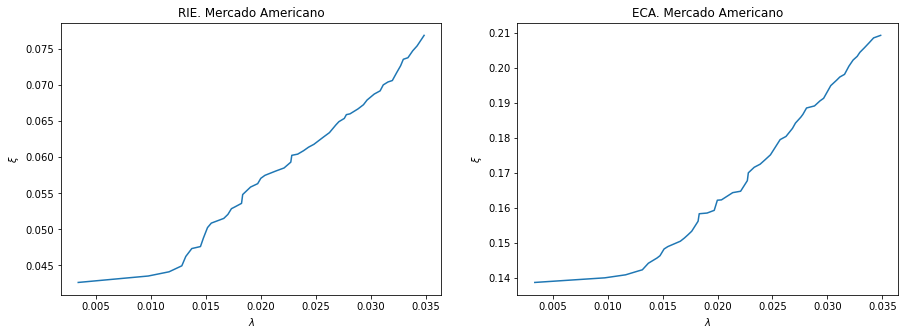

In [127]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(eigenval_sample_american[:50], eigenval_rie_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[0].set_title("RIE. Mercado Americano")
axs[0].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')

axs[1].plot(eigenval_sample_american[:50], eigenval_shrink_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[1].set_title("ECA. Mercado Americano")
axs[1].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')
plt.show()


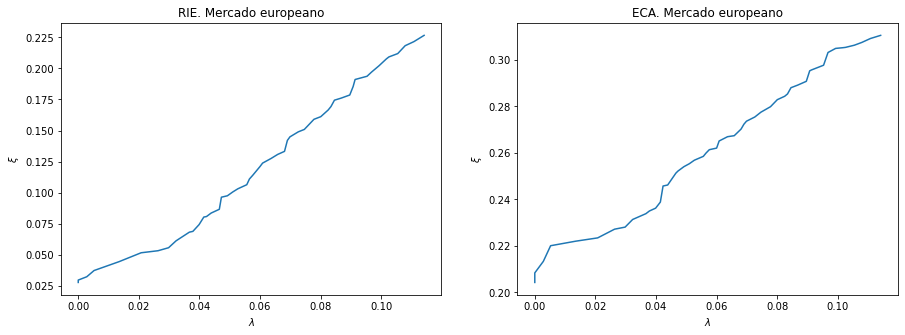

In [128]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(eigenval_sample_european[:50], eigenval_rie_european[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado europeano
axs[0].set_title("RIE. Mercado europeano")
axs[0].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')

axs[1].plot(eigenval_sample_european[:50], eigenval_shrink_european[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado europeano
axs[1].set_title("ECA. Mercado europeano")
axs[1].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')
plt.show()


## Obtener matrices por clustering y su gráfica

### Mercado Europeo

In [191]:
estim, labels = csestimator.get_shrinkage_est(european_returns, 0.5, return_labels = True)

In [192]:
european_returns_sorted = european_returns.iloc[:, labels.argsort()]

In [193]:
R_matrix = np.corrcoef(european_returns_sorted.T)
D_matrix = 1 - R_matrix

In [194]:
labels.sort()

In [195]:
S_matrix = csestimator.get_S_matrix(R_matrix, labels)
R_tilde = csestimator.get_R_tilde(S_matrix, labels)


In [ ]:
R_clust_half = csestimator.get_R_clust(R_matrix, R_tilde, 0.5)
R_clust_zero = csestimator.get_R_clust(R_matrix, R_tilde, 0.2)
R_clust_one = csestimator.get_R_clust(R_matrix, R_tilde, 0.8)
np.fill_diagonal(R_clust_one, 1)
np.fill_diagonal(R_clust_zero, 1)
np.fill_diagonal(R_clust_half, 1)

Text(0.5, 1.0, 'ECA con $\\alpha = 0.8$')

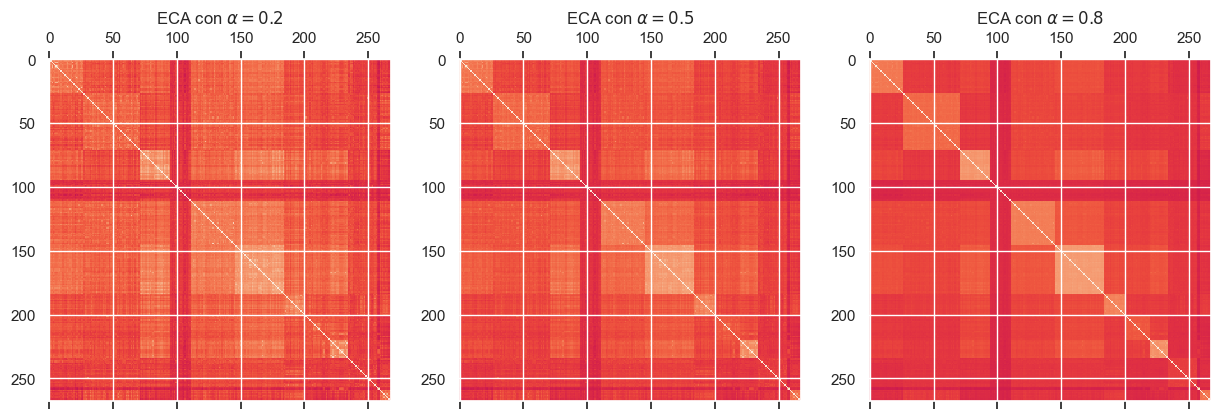

In [199]:
# cambiar colores de los heatmaps

fig, axs = plt.subplots(1,3)
#fig.set_size_inches(18.5, 10.5)
axs[0].matshow(R_clust_zero, vmin=-1, vmax=1)
axs[0].set_title(r"ECA con $\alpha = 0.2$")
axs[1].matshow(R_clust_half, vmin=-1, vmax=1)
axs[1].set_title(r"ECA con $\alpha = 0.5$")
axs[2].matshow(R_clust_one, vmin=-1, vmax=1)
axs[2].set_title(r"ECA con $\alpha = 0.8$")

### Mercado Americano

In [24]:
estim, labels = csestimator.get_shrinkage_est(american_returns, 0.5, return_labels = True)

In [25]:
american_returns_sorted = american_returns.iloc[:, labels.argsort()]

In [26]:
R_matrix = np.corrcoef(american_returns_sorted.T)
D_matrix = 1 - R_matrix

In [27]:
labels.sort()

In [28]:
S_matrix = csestimator.get_S_matrix(R_matrix, labels)
R_tilde = csestimator.get_R_tilde(S_matrix, labels)

In [29]:
R_clust_half = csestimator.get_R_clust(R_matrix, R_tilde, 0.5)
R_clust_zero = csestimator.get_R_clust(R_matrix, R_tilde, 0)
R_clust_one = csestimator.get_R_clust(R_matrix, R_tilde, 1)
np.fill_diagonal(R_clust_one, 1)
np.fill_diagonal(R_clust_zero, 1)
np.fill_diagonal(R_clust_half, 1)

Text(0.5, 1.0, 'ECA con $\\alpha = 0.8$')

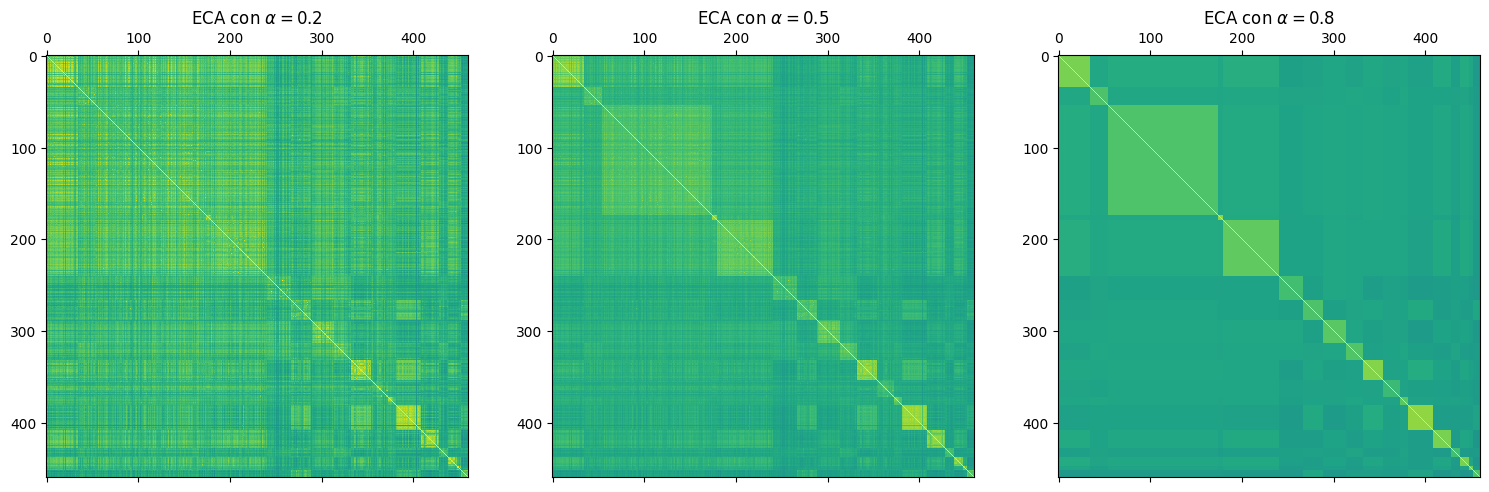

In [38]:

fig, axs = plt.subplots(1,3)
fig.set_size_inches(18.5, 10.5)
axs[0].matshow(R_clust_zero, vmin=-1, vmax=1)
axs[0].set_title(r"ECA con $\alpha = 0.2$")
axs[1].matshow(R_clust_half, vmin=-1, vmax=1)
axs[1].set_title(r"ECA con $\alpha = 0.5$")
axs[2].matshow(R_clust_one, vmin=-1, vmax=1)
axs[2].set_title(r"ECA con $\alpha = 0.8$")
#fig.colorbar(cax)

In [49]:
print(pd.Series(american_returns.columns).to_latex())

\begin{tabular}{ll}
\toprule
{} &      0 \\
\midrule
0   &      A \\
1   &    AAL \\
2   &    AAP \\
3   &   AAPL \\
4   &    ABC \\
5   &   ABMD \\
6   &    ABT \\
7   &    ACN \\
8   &   ADBE \\
9   &    ADI \\
10  &    ADM \\
11  &    ADP \\
12  &   ADSK \\
13  &    AEE \\
14  &    AEP \\
15  &    AES \\
16  &    AFL \\
17  &    AIG \\
18  &    AIZ \\
19  &    AJG \\
20  &   AKAM \\
21  &    ALB \\
22  &   ALGN \\
23  &    ALK \\
24  &    ALL \\
25  &   AMAT \\
26  &    AMD \\
27  &    AME \\
28  &   AMGN \\
29  &    AMP \\
30  &    AMT \\
31  &   AMZN \\
32  &   ANSS \\
33  &   ANTM \\
34  &    AON \\
35  &    AOS \\
36  &    APA \\
37  &    APD \\
38  &    APH \\
39  &   APTV \\
40  &    ARE \\
41  &    ATO \\
42  &   ATVI \\
43  &    AVB \\
44  &   AVGO \\
45  &    AVY \\
46  &    AWK \\
47  &    AXP \\
48  &    AZO \\
49  &     BA \\
50  &    BAC \\
51  &    BAX \\
52  &   BBWI \\
53  &    BBY \\
54  &    BDX \\
55  &    BEN \\
56  &   BF-B \\
57  &   BIIB \\
58  &    BIO \\
59 

## Gráficas de distribución de valores propios y cálculo de distancias de frobenius

### Mercado Americano

In [12]:
# primer periodo
rie_est_american = rie_estimator.get_rie(norm_american_returns.iloc[:numbs_obser_amer, :])
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.5)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.2)
shrink_estimator_american_8 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.8)
samp_corr_american_norm = norm_american_returns.iloc[:numbs_obser_amer,:].corr()
# segundo periodo
rie_est_american_2do = rie_estimator.get_rie(norm_american_returns.iloc[numbs_obser_amer:numbs_obser_amer*2, :])
shrink_estimator_american_5_2do = csestimator.get_shrinkage_est(norm_american_returns.iloc[numbs_obser_amer:numbs_obser_amer*2,:], 0.5)
shrink_estimator_american_2_2do = csestimator.get_shrinkage_est(norm_american_returns.iloc[numbs_obser_amer:numbs_obser_amer*2,:], 0.2)
shrink_estimator_american_8_2do = csestimator.get_shrinkage_est(norm_american_returns.iloc[numbs_obser_amer:numbs_obser_amer*2,:], 0.8)
samp_corr_american_norm_2do = norm_american_returns.iloc[numbs_obser_amer:numbs_obser_amer*2,:].corr()

In [13]:
#eigenvalues primer periodo
eigenval_sample_american, eigenvec_sample_american = np.linalg.eig(samp_corr_american_norm.values)
eigenval_rie_american, eigenvec_rie_american = np.linalg.eig(rie_est_american)
eigenval_shrink_american_5, eigenvec_shrink_american_5 = np.linalg.eig(shrink_estimator_american_5)
eigenval_shrink_american_2, eigenvec_shrink_american_2 = np.linalg.eig(shrink_estimator_american_2)
eigenval_shrink_american_8, eigenvec_shrink_american_8 = np.linalg.eig(shrink_estimator_american_8)
#eigenvalues segundo periodo
eigenval_sample_american_2do, eigenvec_sample_american_2do = np.linalg.eig(samp_corr_american_norm_2do.values)
eigenval_rie_american_2do, eigenvec_rie_american_2do = np.linalg.eig(rie_est_american_2do)
eigenval_shrink_american_5_2do, eigenvec_shrink_american_5_2do = np.linalg.eig(shrink_estimator_american_5_2do)
eigenval_shrink_american_2_2do, eigenvec_shrink_american_2_2do = np.linalg.eig(shrink_estimator_american_2_2do)
eigenval_shrink_american_8_2do, eigenvec_shrink_american_8_2do = np.linalg.eig(shrink_estimator_american_8_2do)

In [14]:
# concatenar valores propios
eigenval_sample_american_conc = np.concatenate((eigenval_sample_american, eigenval_sample_american_2do), axis=0)
eigenval_rie_american_conc = np.concatenate((eigenval_rie_american, eigenval_rie_american_2do), axis=0)
eigenval_shrink_american_2_conc = np.concatenate((eigenval_shrink_american_2, eigenval_shrink_american_2_2do), axis=0)
eigenval_shrink_american_5_conc = np.concatenate((eigenval_shrink_american_5, eigenval_shrink_american_5_2do), axis=0)
eigenval_shrink_american_8_conc = np.concatenate((eigenval_shrink_american_8, eigenval_shrink_american_8_2do), axis=0)

In [15]:
# ordenar valores propios
eigenval_sample_american_conc.sort()
eigenval_rie_american_conc.sort()
eigenval_shrink_american_2_conc.sort()
eigenval_shrink_american_5_conc.sort()
eigenval_shrink_american_8_conc.sort()

Notar que en la siguiente gráfica, aumentar el nivel de regularización del ECA reduce el número de valores propios pequeños y grandes y reduce el rango de estos valores, notándo así la relación entre el parámetro de encogimiento $\alpha$ y el filtrado de los valores propios

Text(0.5, 1.0, 'Distribución de Valores Propios para el ECA - Mercado Americano')

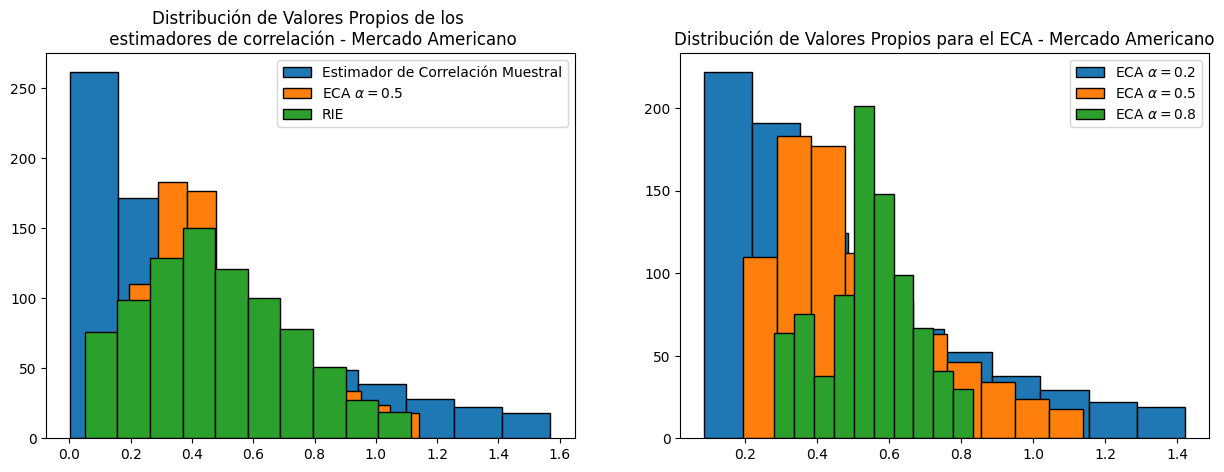

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_american_conc[:850], ec = 'black')
axs[0].hist(eigenval_shrink_american_5_conc[:850],ec = 'black')
axs[0].hist(eigenval_rie_american_conc[:850], ec = 'black')
axs[0].legend(labels=['Estimador de Correlación Muestral', r'ECA $\alpha = 0.5$','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Distribución de Valores Propios de los \n estimadores de correlación - Mercado Americano")

axs[1].hist(eigenval_shrink_american_2_conc[:850], ec = 'black')
axs[1].hist(eigenval_shrink_american_5_conc[:850], ec = 'black')
axs[1].hist(eigenval_shrink_american_8_conc[:850], ec = 'black')
axs[1].legend(labels=[r'ECA $\alpha = 0.2$', r'ECA $\alpha = 0.5$',r'ECA $\alpha = 0.8$'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[1].set_title("Distribución de Valores Propios para el ECA - Mercado Americano")

Text(0.5, 1.0, 'Distribución de Valores Propios para el ECA - Mercado Americano')

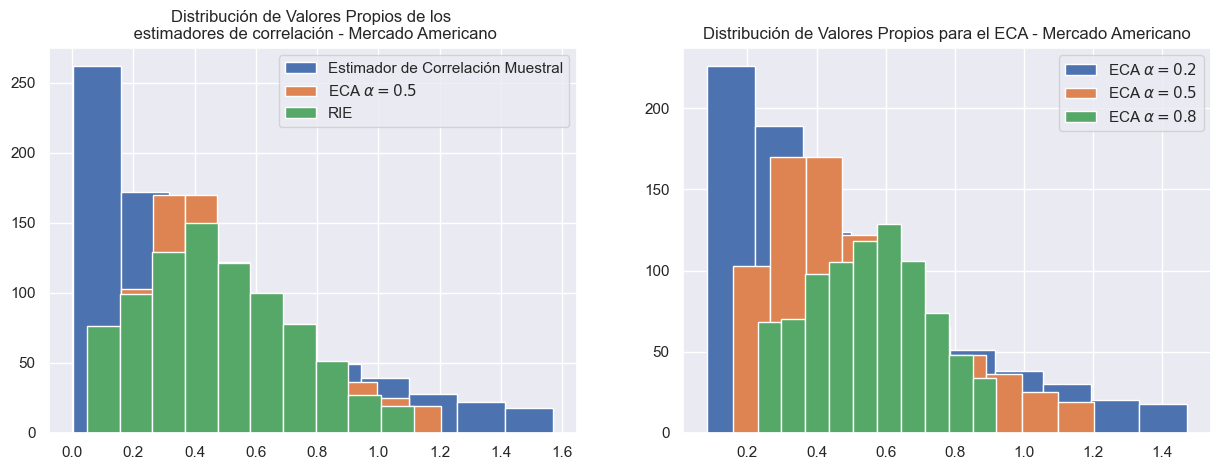

In [117]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_american_conc[:850])
axs[0].hist(eigenval_shrink_american_5_conc[:850])
axs[0].hist(eigenval_rie_american_conc[:850])
axs[0].legend(labels=['Estimador de Correlación Muestral', r'ECA $\alpha = 0.5$','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Distribución de Valores Propios de los \n estimadores de correlación - Mercado Americano")

axs[1].hist(eigenval_shrink_american_2_conc[:850])
axs[1].hist(eigenval_shrink_american_5_conc[:850])
axs[1].hist(eigenval_shrink_american_8_conc[:850])
axs[1].legend(labels=[r'ECA $\alpha = 0.2$', r'ECA $\alpha = 0.5$',r'ECA $\alpha = 0.8$'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[1].set_title("Distribución de Valores Propios para el ECA - Mercado Americano")

In [16]:
print((np.linalg.norm(((samp_corr_american_norm - rie_est_american).values), ord = "fro") + np.linalg.norm(((samp_corr_american_norm_2do - rie_est_american_2do).values), ord = "fro"))/2)
print((np.linalg.norm(((samp_corr_american_norm - shrink_estimator_american_2).values), ord = "fro") + np.linalg.norm(((samp_corr_american_norm_2do - shrink_estimator_american_2_2do).values), ord = "fro"))/2)
print((np.linalg.norm(((samp_corr_american_norm - shrink_estimator_american_5).values), ord = "fro") + np.linalg.norm(((samp_corr_american_norm_2do - shrink_estimator_american_5_2do).values), ord = "fro"))/2)
print((np.linalg.norm(((samp_corr_american_norm - shrink_estimator_american_8).values), ord = "fro") + np.linalg.norm(((samp_corr_american_norm_2do - shrink_estimator_american_8_2do).values), ord = "fro"))/2)


4.968109763781372
15.134765095299315
37.836912738248365
60.53906038119731


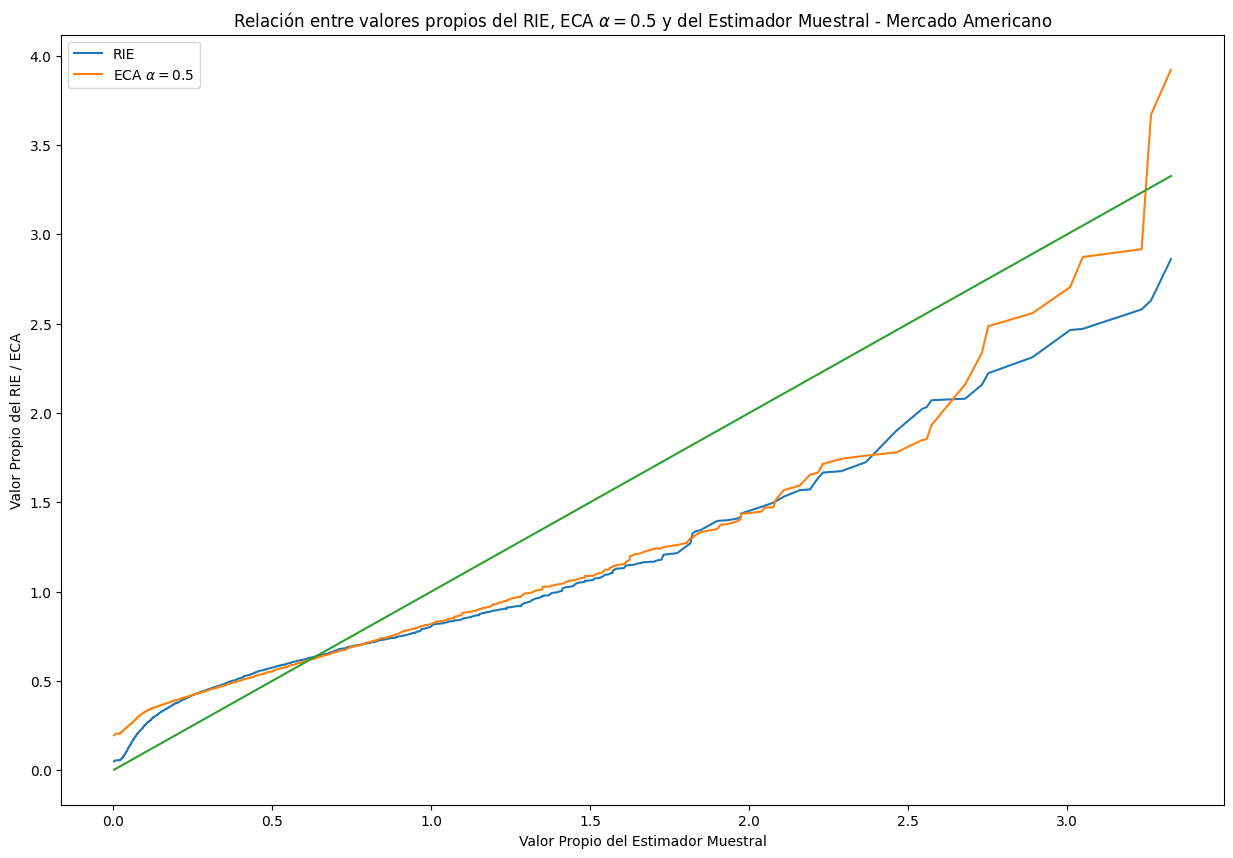

In [17]:
factor = 900
fig, axs = plt.subplots(1,1, figsize=(15,10))
axs.plot(  eigenval_sample_american_conc[:factor], eigenval_rie_american_conc[:factor])
axs.set_title(r"Relación entre valores propios del RIE, ECA $\alpha = 0.5$ y del Estimador Muestral - Mercado Americano")
axs.set(xlabel='Valor Propio del Estimador Muestral', ylabel='Valor Propio del RIE / ECA')
axs.plot(eigenval_sample_american_conc[:factor], eigenval_shrink_american_5_conc[:factor])
axs.plot(eigenval_sample_american_conc[:factor], eigenval_sample_american_conc[:factor])
axs.legend(labels = ['RIE', r'ECA $\alpha = 0.5$'])
plt.show()



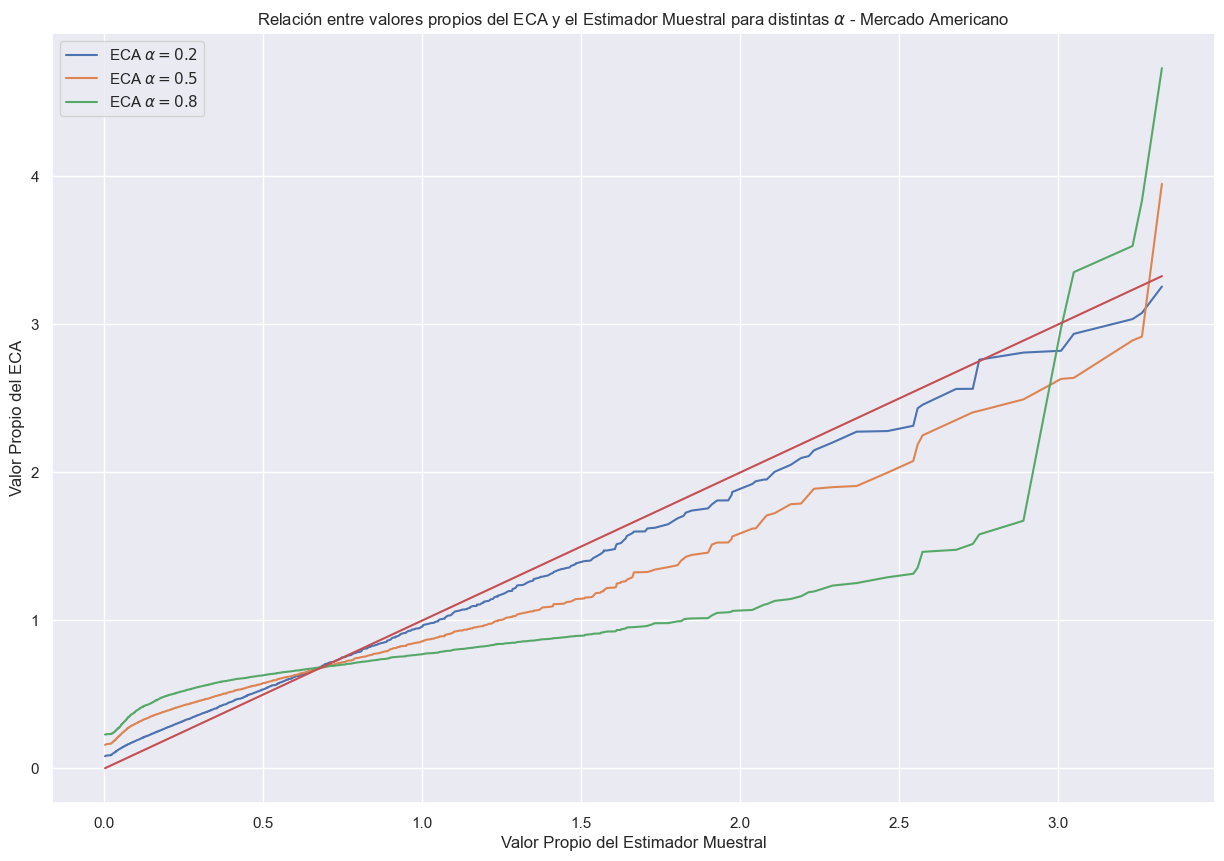

In [189]:
factor = 900
fig, axs = plt.subplots(1,1, figsize=(15,10))
axs.plot(eigenval_sample_american_conc[:factor], eigenval_shrink_american_2_conc[:factor])
axs.plot(eigenval_sample_american_conc[:factor], eigenval_shrink_american_5_conc[:factor])
axs.plot(eigenval_sample_american_conc[:factor], eigenval_shrink_american_8_conc[:factor])
axs.plot(eigenval_sample_american_conc[:factor], eigenval_sample_american_conc[:factor])
axs.set_title(r"Relación entre valores propios del ECA y el Estimador Muestral para distintas $\alpha$ - Mercado Americano")
axs.set(xlabel='Valor Propio del Estimador Muestral', ylabel='Valor Propio del ECA')

axs.legend(labels = [r'ECA $\alpha = 0.2$', r'ECA $\alpha = 0.5$', r'ECA $\alpha = 0.8$'])
plt.show()

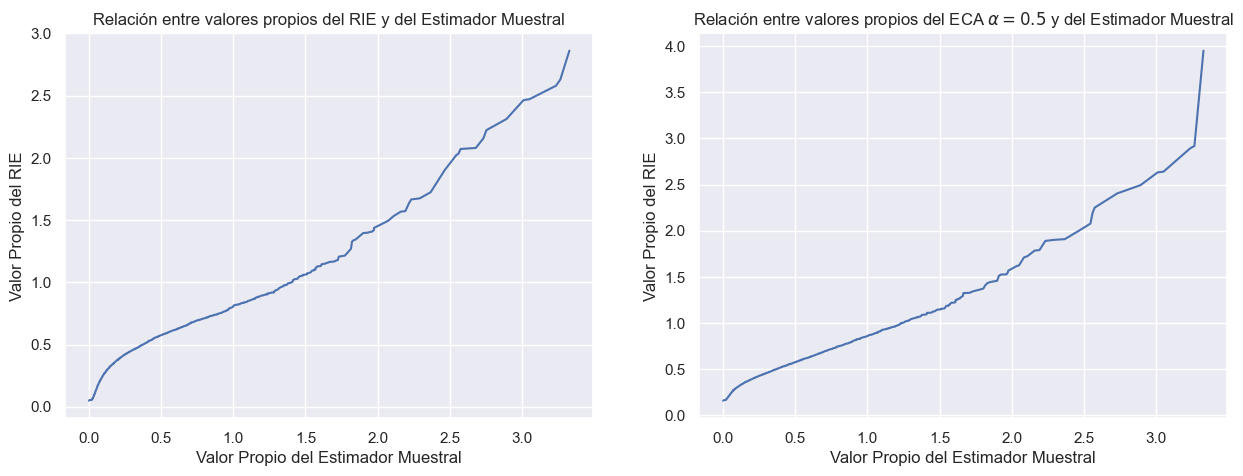

In [160]:
factor = 900
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(  eigenval_sample_american_conc[:factor], eigenval_rie_american_conc[:factor])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[0].set_title("Relación entre valores propios del RIE y del Estimador Muestral")
axs[0].set(xlabel='Valor Propio del Estimador Muestral', ylabel='Valor Propio del RIE')

axs[1].plot(eigenval_sample_american_conc[:factor], eigenval_shrink_american_5_conc[:factor])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[1].set_title(r"Relación entre valores propios del ECA $\alpha = 0.5$ y del Estimador Muestral")
axs[1].set(xlabel='Valor Propio del Estimador Muestral', ylabel='Valor Propio del RIE')
# axs[0].set_xlim(0,4)
# axs[0].set_ylim(0,4)
# axs[1].set_xlim(0,4)
# axs[1].set_ylim(0,4)
plt.show()



### Mercado Europeo

In [23]:
norm_european_returns.iloc[:numbs_obser_eur, :].shape

(536, 268)

In [18]:
# primer periodo
rie_est_european = rie_estimator.get_rie(norm_european_returns.iloc[:numbs_obser_eur, :])
shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.2)
shrink_estimator_european_8 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.8)
samp_corr_european_norm = norm_european_returns.iloc[:numbs_obser_eur,:].corr()
# segundo periodo
rie_est_european_2do = rie_estimator.get_rie(norm_european_returns.iloc[numbs_obser_eur:numbs_obser_eur*2, :])
shrink_estimator_european_5_2do = csestimator.get_shrinkage_est(norm_european_returns.iloc[numbs_obser_eur:numbs_obser_eur*2,:], 0.5)
shrink_estimator_european_2_2do = csestimator.get_shrinkage_est(norm_european_returns.iloc[numbs_obser_eur:numbs_obser_eur*2,:], 0.2)
shrink_estimator_european_8_2do = csestimator.get_shrinkage_est(norm_european_returns.iloc[numbs_obser_eur:numbs_obser_eur*2,:], 0.8)
samp_corr_european_norm_2do = norm_european_returns.iloc[numbs_obser_eur:numbs_obser_eur*2,:].corr()
# tercer periodo
rie_est_european_3ro = rie_estimator.get_rie(norm_european_returns.iloc[numbs_obser_eur*2:numbs_obser_eur*3, :])
shrink_estimator_european_5_3ro = csestimator.get_shrinkage_est(norm_european_returns.iloc[numbs_obser_eur*2:numbs_obser_eur*3,:], 0.5)
shrink_estimator_european_2_3ro = csestimator.get_shrinkage_est(norm_european_returns.iloc[numbs_obser_eur*2:numbs_obser_eur*3,:], 0.2)
shrink_estimator_european_8_3ro = csestimator.get_shrinkage_est(norm_european_returns.iloc[numbs_obser_eur*2:numbs_obser_eur*3,:], 0.8)
samp_corr_european_norm_3ro = norm_european_returns.iloc[numbs_obser_eur*2:numbs_obser_eur*3,:].corr()
# cuarto periodo
rie_est_european_4to = rie_estimator.get_rie(norm_european_returns.iloc[numbs_obser_eur*3:numbs_obser_eur*4, :])
shrink_estimator_european_5_4to = csestimator.get_shrinkage_est(norm_european_returns.iloc[numbs_obser_eur*3:numbs_obser_eur*4,:], 0.5)
shrink_estimator_european_2_4to = csestimator.get_shrinkage_est(norm_european_returns.iloc[numbs_obser_eur*3:numbs_obser_eur*4,:], 0.2)
shrink_estimator_european_8_4to = csestimator.get_shrinkage_est(norm_european_returns.iloc[numbs_obser_eur*3:numbs_obser_eur*4,:], 0.8)
samp_corr_european_norm_4to = norm_european_returns.iloc[numbs_obser_eur*3:numbs_obser_eur*4,:].corr()

In [19]:
#eigenvalues primer periodo
eigenval_sample_european, eigenvec_sample_european = np.linalg.eig(samp_corr_european_norm.values)
eigenval_rie_european, eigenvec_rie_european = np.linalg.eig(rie_est_european)
eigenval_shrink_european_5, eigenvec_shrink_european_5 = np.linalg.eig(shrink_estimator_european_5)
eigenval_shrink_european_2, eigenvec_shrink_european_2 = np.linalg.eig(shrink_estimator_european_2)
eigenval_shrink_european_8, eigenvec_shrink_european_8 = np.linalg.eig(shrink_estimator_european_8)
#eigenvalues segundo periodo
eigenval_sample_european_2do, eigenvec_sample_european_2do = np.linalg.eig(samp_corr_european_norm_2do.values)
eigenval_rie_european_2do, eigenvec_rie_european_2do = np.linalg.eig(rie_est_european_2do)
eigenval_shrink_european_5_2do, eigenvec_shrink_european_5_2do = np.linalg.eig(shrink_estimator_european_5_2do)
eigenval_shrink_european_2_2do, eigenvec_shrink_european_2_2do = np.linalg.eig(shrink_estimator_european_2_2do)
eigenval_shrink_european_8_2do, eigenvec_shrink_european_8_2do = np.linalg.eig(shrink_estimator_european_8_2do)
#eigenvalues tercer periodo
eigenval_sample_european_3ro, eigenvec_sample_european_3ro = np.linalg.eig(samp_corr_european_norm_3ro.values)
eigenval_rie_european_3ro, eigenvec_rie_european_3ro = np.linalg.eig(rie_est_european_3ro)
eigenval_shrink_european_5_3ro, eigenvec_shrink_european_5_3ro = np.linalg.eig(shrink_estimator_european_5_3ro)
eigenval_shrink_european_2_3ro, eigenvec_shrink_european_2_3ro = np.linalg.eig(shrink_estimator_european_2_3ro)
eigenval_shrink_european_8_3ro, eigenvec_shrink_european_8_3ro = np.linalg.eig(shrink_estimator_european_8_3ro)
#eigenvalues cuarto periodo
eigenval_sample_european_4to, eigenvec_sample_european_4to = np.linalg.eig(samp_corr_european_norm_4to.values)
eigenval_rie_european_4to, eigenvec_rie_european_4to = np.linalg.eig(rie_est_european_4to)
eigenval_shrink_european_5_4to, eigenvec_shrink_european_5_4to = np.linalg.eig(shrink_estimator_european_5_4to)
eigenval_shrink_european_2_4to, eigenvec_shrink_european_2_4to = np.linalg.eig(shrink_estimator_european_2_4to)
eigenval_shrink_european_8_4to, eigenvec_shrink_european_8_4to = np.linalg.eig(shrink_estimator_european_8_4to)

In [20]:
# concatenar valores propios
eigenval_sample_european_conc = np.concatenate((eigenval_sample_european, eigenval_sample_european_2do, eigenval_sample_european_3ro, eigenval_sample_european_4to), axis=0)
eigenval_rie_european_conc = np.concatenate((eigenval_rie_european, eigenval_rie_european_2do, eigenval_rie_european_3ro, eigenval_rie_european_4to), axis=0)
eigenval_shrink_european_2_conc = np.concatenate((eigenval_shrink_european_2, eigenval_shrink_european_2_2do, eigenval_shrink_european_2_3ro, eigenval_shrink_european_2_4to), axis=0)
eigenval_shrink_european_5_conc = np.concatenate((eigenval_shrink_european_5, eigenval_shrink_european_5_2do, eigenval_shrink_european_5_3ro, eigenval_shrink_european_5_4to), axis=0)
eigenval_shrink_european_8_conc = np.concatenate((eigenval_shrink_european_8, eigenval_shrink_european_8_2do, eigenval_shrink_european_8_3ro, eigenval_shrink_european_8_4to), axis=0)

In [21]:
# ordenar valores propios
eigenval_sample_european_conc.sort()
eigenval_rie_european_conc.sort()
eigenval_shrink_european_2_conc.sort()
eigenval_shrink_european_5_conc.sort()
eigenval_shrink_european_8_conc.sort()

In [1]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_european_conc[:1000], ec = 'black', alpha = 0.5)
axs[0].hist(eigenval_shrink_european_5_conc[:1000], ec = 'black', alpha = 0.5)
axs[0].hist(eigenval_rie_european_conc[:1000], ec = 'black', alpha = 0.5)
axs[0].legend(labels=['Estimador de Correlación Muestral', r'ECA $\alpha = 0.5$','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Distribución de Valores Propios de los \n estimadores de correlación - Mercado Europeo")

axs[1].hist(eigenval_shrink_european_2_conc[:850], ec='black')
axs[1].hist(eigenval_shrink_european_5_conc[:850], ec='black')
axs[1].hist(eigenval_shrink_european_8_conc[:850], ec='black')
axs[1].legend(labels=[r'ECA $\alpha = 0.2$', r'ECA $\alpha = 0.5$',r'ECA $\alpha = 0.8$'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado europeano"
axs[1].set_title("Distribución de Valores Propios para el ECA - Mercado Europeo")

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'Distribución de Valores Propios para el ECA - Mercado Americano')

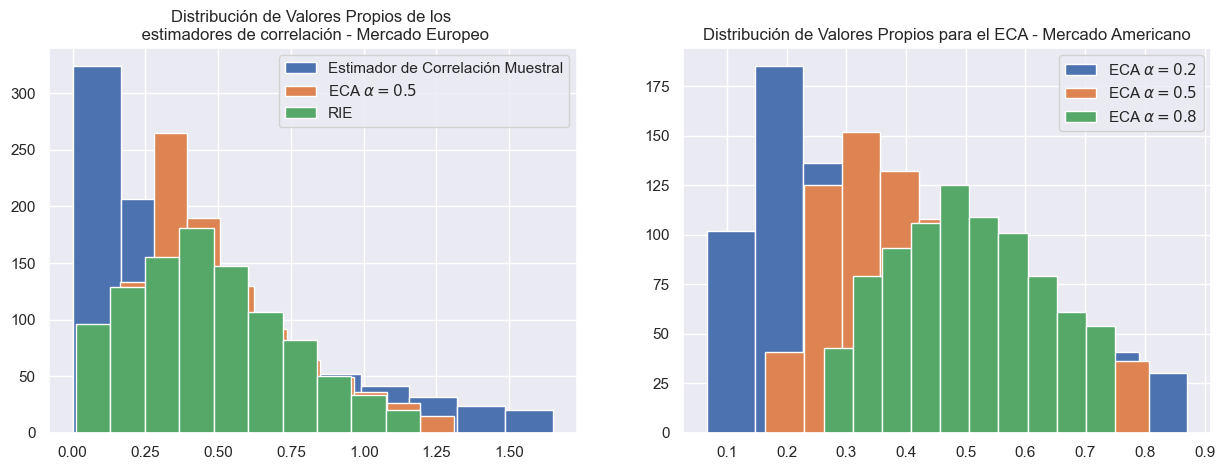

In [119]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_european_conc[:1000])
axs[0].hist(eigenval_shrink_european_5_conc[:1000])
axs[0].hist(eigenval_rie_european_conc[:1000])
axs[0].legend(labels=['Estimador de Correlación Muestral', r'ECA $\alpha = 0.5$','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Distribución de Valores Propios de los \n estimadores de correlación - Mercado Europeo")

axs[1].hist(eigenval_shrink_european_2_conc[:850])
axs[1].hist(eigenval_shrink_european_5_conc[:850])
axs[1].hist(eigenval_shrink_european_8_conc[:850])
axs[1].legend(labels=[r'ECA $\alpha = 0.2$', r'ECA $\alpha = 0.5$',r'ECA $\alpha = 0.8$'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado europeano"
axs[1].set_title("Distribución de Valores Propios para el ECA - Mercado Americano")

Notar que al comparar las frob dist entre las matrices y entre mercados, en el mercado americano las matrices son más distintas entre sí con lo que respeta al rie pero no con lo que respecta al eca.

In [113]:
print((np.linalg.norm(((samp_corr_european_norm - rie_est_european).values), ord = "fro") + np.linalg.norm(((samp_corr_european_norm_2do - rie_est_european_2do).values), ord = "fro") + np.linalg.norm(((samp_corr_european_norm_3ro - rie_est_european_3ro).values), ord = "fro") + np.linalg.norm(((samp_corr_european_norm_4to - rie_est_european_4to).values), ord = "fro"))/4)
print((np.linalg.norm(((samp_corr_european_norm - shrink_estimator_european_2).values), ord = "fro") + np.linalg.norm(((samp_corr_european_norm_2do - shrink_estimator_european_2_2do).values), ord = "fro")+ np.linalg.norm(((samp_corr_european_norm_3ro - shrink_estimator_european_2_3ro).values), ord = "fro") + np.linalg.norm(((samp_corr_european_norm_4to - shrink_estimator_european_2_4to).values), ord = "fro"))/4)
print((np.linalg.norm(((samp_corr_european_norm - shrink_estimator_european_5).values), ord = "fro") + np.linalg.norm(((samp_corr_european_norm_2do - shrink_estimator_european_5_2do).values), ord = "fro") + np.linalg.norm(((samp_corr_european_norm_3ro - shrink_estimator_european_5_3ro).values), ord = "fro")+np.linalg.norm(((samp_corr_european_norm_4to - shrink_estimator_european_5_4to).values), ord = "fro"))/4)
print((np.linalg.norm(((samp_corr_european_norm - shrink_estimator_european_8).values), ord = "fro") + np.linalg.norm(((samp_corr_european_norm_2do - shrink_estimator_european_8_2do).values), ord = "fro") + np.linalg.norm(((samp_corr_european_norm_3ro - shrink_estimator_european_8_3ro).values), ord = "fro")+ np.linalg.norm(((samp_corr_european_norm_4to - shrink_estimator_european_8_4to).values), ord = "fro"))/4)


3.5843927422335997
9.161286890503899
22.90321722625981
36.64514756201562


In [171]:
eigenval_sample_european_conc.shape

(1072,)

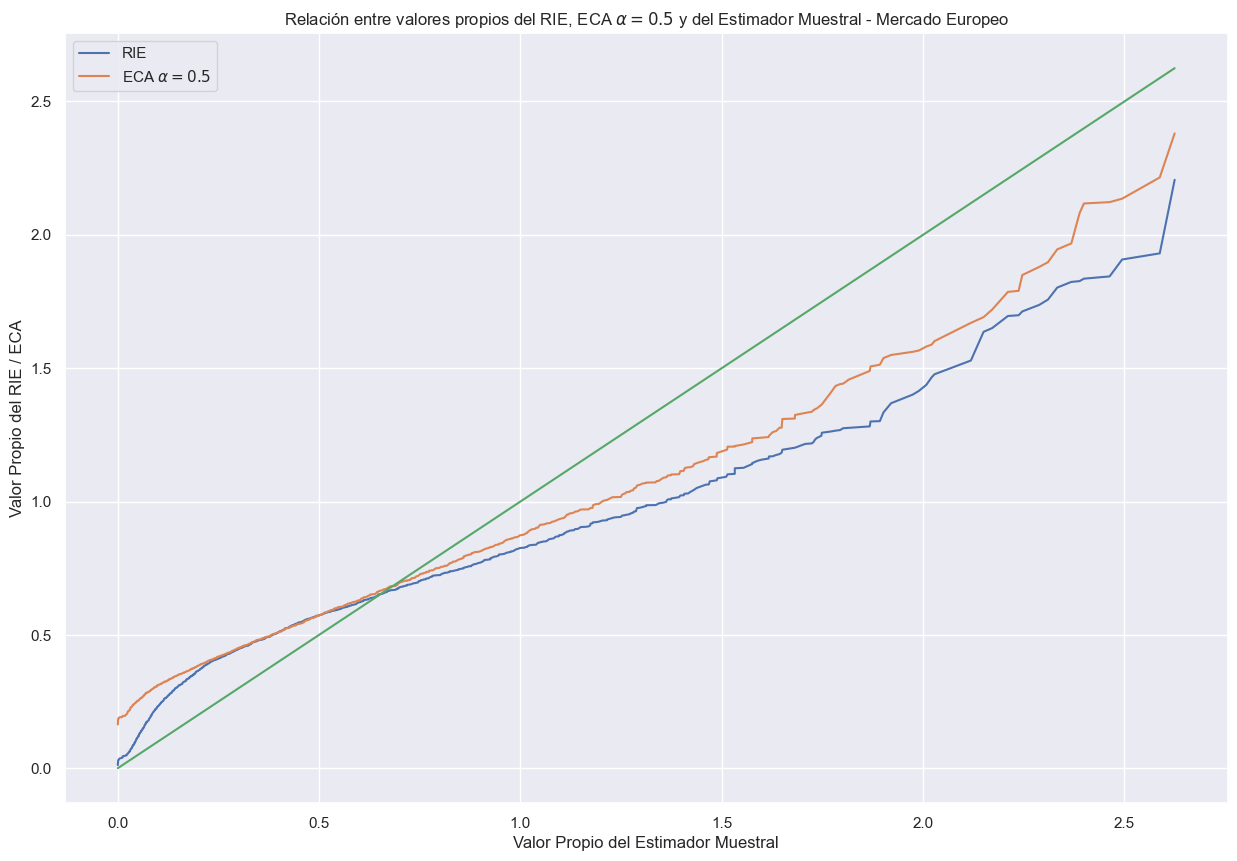

In [187]:
factor = 1040
fig, axs = plt.subplots(1,1, figsize=(15,10))
axs.plot(  eigenval_sample_european_conc[:factor], eigenval_rie_european_conc[:factor])
axs.set_title(r"Relación entre valores propios del RIE, ECA $\alpha = 0.5$ y del Estimador Muestral - Mercado Europeo")
axs.set(xlabel='Valor Propio del Estimador Muestral', ylabel='Valor Propio del RIE / ECA')
axs.plot(eigenval_sample_european_conc[:factor], eigenval_shrink_european_5_conc[:factor])
axs.plot(eigenval_sample_european_conc[:factor], eigenval_sample_european_conc[:factor])
axs.legend(labels = ['RIE', r'ECA $\alpha = 0.5$'])
plt.show()



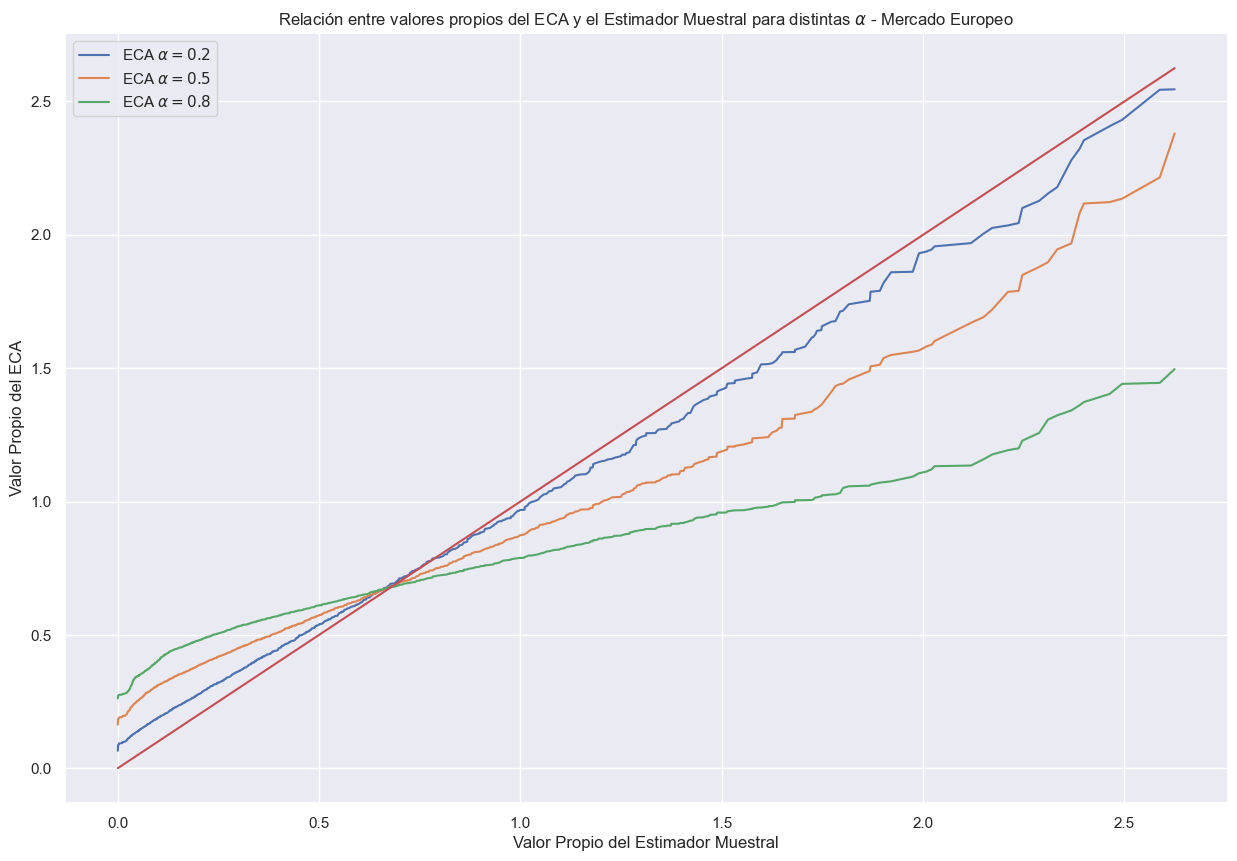

In [188]:
factor = 1040
fig, axs = plt.subplots(1,1, figsize=(15,10))
axs.plot(eigenval_sample_european_conc[:factor], eigenval_shrink_european_2_conc[:factor])
axs.plot(eigenval_sample_european_conc[:factor], eigenval_shrink_european_5_conc[:factor])
axs.plot(eigenval_sample_european_conc[:factor], eigenval_shrink_european_8_conc[:factor])
axs.plot(eigenval_sample_european_conc[:factor], eigenval_sample_european_conc[:factor])
axs.set_title(r"Relación entre valores propios del ECA y el Estimador Muestral para distintas $\alpha$ - Mercado Europeo")
axs.set(xlabel='Valor Propio del Estimador Muestral', ylabel='Valor Propio del ECA')

axs.legend(labels = [r'ECA $\alpha = 0.2$', r'ECA $\alpha = 0.5$', r'ECA $\alpha = 0.8$'])
plt.show()